<center>
<font size='7' style="color:#0D47A1">  <b>DECISION TREES</b> </font>
</center>

<hr style= "height:3px;">
<br>

<font size='6' style="color:#00A6D6">  <b>Introduction. What are they?</b> </font>

Decision Trees are predictive models that choose distinguishing observations, or features, about a set of data to predict each data element's target value, also known as the data element's class. 

To further explain, each feature is represented in the internal nodes and branches of the tree. At each node, we see a split of the data set on that feature, either leading to another internal node with a another distinguishing observation or to a specific class, called a leaf.

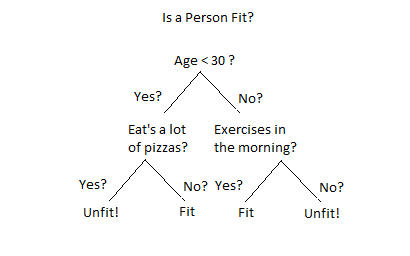

In [6]:
Image(filename='./Decision-Trees.png')

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Types of Decision Trees</b> </font>

- **Classification Trees**
    - An analysis where the target data, or classes, are discretized
- **Regression Trees**
    - An analysis where the classes are continuous, i.e. they take on real numbers.
        - *This is not to say they have infinite domain*


<font size='5' style="color:#4CAF50">  <b>Ensembles</b></font>

Decision trees are commonly used in ensembles to better predict the classes within a set of data. There are many techniques to create these ensembles, some common ones are:

- Boosted Trees
    - incrementally building an ensemble of trees by applying boosted methods
- Bagged Trees
    - Building multiple trees by resampling the data each time and deciding on a class by a consensus prediction

In the following program you can change the depth value to visualize how the classifier splits the data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 
X, y = make_blobs(centers=[[0, 0], [1, 1]], n_samples=50)

def plot_forest(max_depth=1):
    plt.figure()
    ax = plt.gca()
    h = 0.02

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    if max_depth != 0:
        forest = RandomForestClassifier(n_estimators=1, max_depth=max_depth,
                                        random_state=1).fit(X, y)
        Z = forest.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=.4)
        ax.set_title("max_depth = %d" % max_depth)
    else:
        ax.set_title("data set")
    ax.scatter(X[:, 0], X[:, 1], c=np.array(['b', 'r'])[y], s=60)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


def plot_forest_interactive():
    from IPython.html.widgets import interactive, IntSlider
    slider = IntSlider(min=0, max=8, step=1, value=0)
    return interactive(plot_forest, max_depth=slider)
plot_forest_interactive()

interactive(children=(IntSlider(value=0, description='max_depth', max=8), Output()), _dom_classes=('widget-int…

In the above program there is a parameter called n_estimators. If you change the value of that number, the algorithm will consider several trees to make their decision, this are called random forest and you can find information about them here:https://en.wikipedia.org/wiki/Random_forest

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Strengths/Weaknesses of a Decision Tree</b> </font>

<font size='5' style="color:#4CAF50">  <b>Some Advantages</b></font>

 - Simple to understand
 - Can Handle both numerical and categorical data (We will see this soon)
 - Relatively little Data preparation needed
 - The mechanism for the model can be easily extracted and understood
 - Robust against co-linearity

<font size='5' style="color:#4CAF50">  <b>Some Disadvantages</b></font>

- Accuracy
- Not very robust in general
- Overfitting
- Locality of Optimization

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>How to Build a Decision Tree?</b> </font>

<font size='5' style="color:#4CAF50">  <b>ID3</b></font>

This method uses a maximization of Information gain or a minimization of entropy to determine how to split the tree at each node.

<font size='5' style="color:#4CAF50">  <b>Definitions</b></font>

**Entropy**

$$
H(X) = \sum_{y \in Y} -p(y) log_2 p(y)
$$

where
- X is a data set
- Y is the subset of classes in X
- p(y) is the proportion of the class y in the subset Y

**Information Gain**

$$
IG(A, X) = H(X) - \sum_{s \in S} p(s)H(s)
$$

where
- A is the attribute we are splitting the data on
- S is the set of subsets created when the data was split, i.e. 
$$ 
X = \cup_{s \in S} s
$$
- p(s) is the proportion of the amount of elements in s to total amount of elements in X

*In ID3, we choose to split data on either the largest energy gain or the smallest entropy.*

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>ID3 Pseudocode</b> </font>

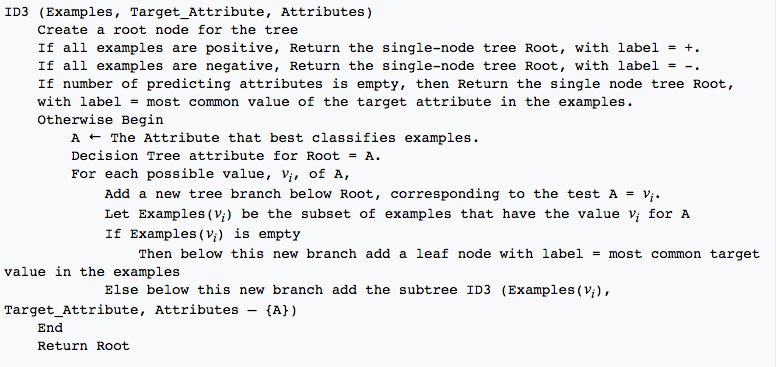

In [7]:
Image(filename='./pseudo.png')

In [8]:
from IPython.display import Image
import numpy as np

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Summary</b> </font>

According to [1].

Classification Tree are used when you have Discrete output.

It's a Supervised Learning algorithm (ID3, C4.5).

When to use it:
    
    when we have a finite number of classification categories
    the data can be represented as vectors
    you want to understand how the classifier makes its choices

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Example</b> </font>

The following is an example from Brian Pardo's course at NU.

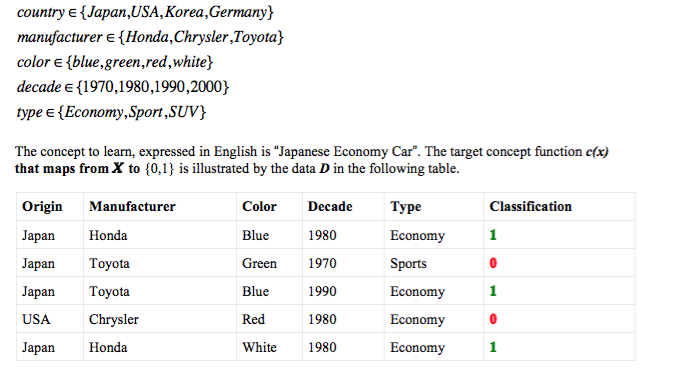

In [9]:
Image(filename='./problem.png')

In [10]:
Origin = [0, 0, 0, 1, 0]
Manu = [0, 2, 2, 1, 0]
Color = [0, 1, 0, 2, 3]
Year = [1, 0, 2, 1, 1]
Type = [0, 1, 0, 0, 0]
target = [1, 0, 1, 0, 1]

In [11]:
def partition(a):
    return {c: (a==c).nonzero()[0] for c in np.unique(a)}
#for splitting a set
# maps each unique value to its indicies in an array
# nonzero: return the indices of the elements that are non-zero.

print(partition(Origin))

{0: array([0, 1, 2, 4]), 1: array([3])}


In [12]:
import numpy as np
def entropy(s):
    res = 0
    val, counts = np.unique(s, return_counts=True)
    freqs = counts.astype('float')/len(s)
    
    for p in freqs:
        if p != 0.0:
            res -= p * np.log2(p)
    return res


In [13]:
for i, word in enumerate([Origin, Manu, Color, Year, Type]):
    print('feature ',i,' has entropy: ', entropy(word))

feature  0  has entropy:  0.7219280948873623
feature  1  has entropy:  1.5219280948873621
feature  2  has entropy:  1.9219280948873623
feature  3  has entropy:  1.3709505944546687
feature  4  has entropy:  0.7219280948873623


We choose Origin as the root of the Tree. All cars with origin USA have a classification of 0. We calculate the entropy of the remaining unused attributes on the data that has Origin=Japan.

In [14]:

ManuJapan = [0, 2, 2,  0]
ColorJapan = [0, 1, 0,  3]
YearJapan = [1, 0, 2,  1]
TypeJapan = [0, 1, 0,  0]

In [15]:
for i, word in enumerate([ManuJapan, ColorJapan, YearJapan, TypeJapan]):
    print('feature ',i+1,' has entropy: ', entropy(word))

feature  1  has entropy:  1.0
feature  2  has entropy:  1.5
feature  3  has entropy:  1.5
feature  4  has entropy:  0.8112781244591328


Then we can select feature 4=Type. After asking two questions, our Tree describes the concept "Japanese Economic Car" on our data.

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>Homework</b> </font>

The following code imports the Wine data set.


In [ ]:
from sklearn.datasets import load_wine
data = load_wine()

Data Set Characteristics.

Number of Instances: 178 (50 in each of three classes)

Number of Attributes: 13 numeric, predictive attributes and the class

Attribute Information:
 	
    Alcohol
    Malic acid
    Ash
    Alcalinity of ash
    Magnesium
    Total phenols
    Flavanoids
    Nonflavanoid phenols
    Proanthocyanins
    Color intensity
    Hue
    OD280/OD315 of diluted wines
    Proline
class: class_0, class_1, class_2.

Use the notebook "First Machine Learning Notebook" and repeat the analysis with the Wine dataset. Note that now we have more attibutes. 

<br>
<br>
<br>
<font size='6' style="color:#00A6D6">  <b>References</b> </font>


[1] http://www.cs.northwestern.edu/~pardo/courses/eecs349/index.php

[2] https://scikit-learn.org/stable/modules/tree.html

[3] https://en.wikipedia.org/wiki/Decision_tree

[4] https://en.wikipedia.org/wiki/Random_forest
